In [1]:
"""" 
test plot RTOF data (nc files) under smb://mule/disk3/projects/tc2022/tc2023/RTOFS/
"""
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import sys

In [2]:
storm = 'lee13l'
datestr = '20230721F'
path = '/Volumes/disk3/projects/tc2022/tc2023/RTOFS/'+datestr+'/'
filenames_all = np.sort( os.listdir(path) )
filenames = np.array([])
for file in filenames_all:
    if '.nc' in file:
        filenames = np.append(filenames, file)
print(filenames)

['surface.diag.20230721.f000.nc' 'surface.diag.20230721.f001.nc'
 'surface.diag.20230721.f002.nc' 'surface.diag.20230721.f003.nc'
 'surface.diag.20230721.f004.nc' 'surface.diag.20230721.f005.nc'
 'surface.diag.20230721.f006.nc' 'surface.diag.20230721.f007.nc'
 'surface.diag.20230721.f008.nc' 'surface.diag.20230721.f009.nc'
 'surface.diag.20230721.f010.nc' 'surface.diag.20230721.f011.nc'
 'surface.diag.20230721.f012.nc' 'surface.diag.20230721.f013.nc'
 'surface.diag.20230721.f014.nc' 'surface.diag.20230721.f015.nc'
 'surface.diag.20230721.f016.nc' 'surface.diag.20230721.f017.nc'
 'surface.diag.20230721.f018.nc' 'surface.diag.20230721.f019.nc'
 'surface.diag.20230721.f020.nc' 'surface.diag.20230721.f021.nc'
 'surface.diag.20230721.f022.nc' 'surface.diag.20230721.f023.nc'
 'surface.diag.20230721.f024.nc' 'surface.diag.20230721.f025.nc'
 'surface.diag.20230721.f026.nc' 'surface.diag.20230721.f027.nc'
 'surface.diag.20230721.f028.nc' 'surface.diag.20230721.f029.nc'
 'surface.diag.20230721.f

In [3]:
### Read RTOFS data
filename = 'surface.prog.20230721.f065.nc'
ds = nc.Dataset(path+filename)
# print(ds)
str_vars = ['Layer','MT','Longitude','Latitude','u_velocity','v_velocity']
for str_var_i in str_vars:
    temp = ds.variables[str_var_i][:]
    str_exec = str_var_i+'= temp'
    exec(str_exec)
dtime = np.array([datetime.datetime(1900,12,31)+datetime.timedelta(days=days) for days in MT])
print(dtime[0:3],dtime[-1])
print(Layer)
print('lon shape:',Longitude.shape, 'u_velocity shape:',u_velocity.shape)

[datetime.datetime(2023, 7, 23, 17, 0)] 2023-07-23 17:00:00
[1]
lon shape: (3298, 4500) u_velocity shape: (1, 1, 3298, 4500)


lon shape: (3298, 4500) lon180 shape: (3298, 4500)
ratio of ixy/total= 0.005028299979785729


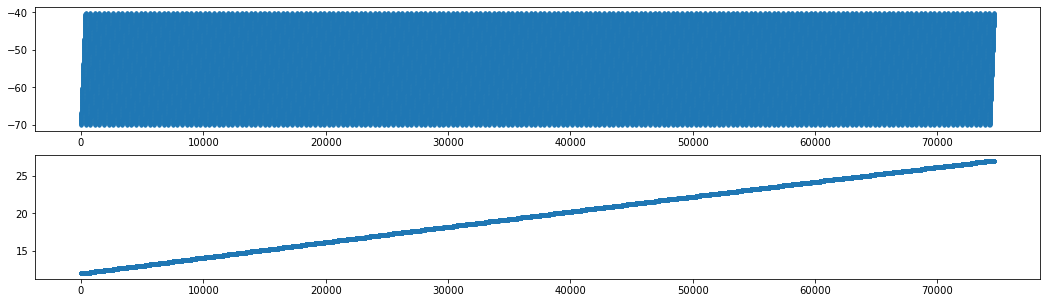

In [24]:
Longitude180 = Longitude
ilon = Longitude > 180
Longitude180[ilon] = Longitude180[ilon]-360
print('lon shape:',Longitude.shape, 'lon180 shape:',Longitude180.shape)
lonlim = [-70,-40]
latlim = [12,27]
ixy = np.where( (Longitude180.flatten()>= lonlim[0]) & (Longitude180.flatten()< lonlim[1]) & \
                (Latitude.flatten()>= latlim[0]) & (Latitude.flatten()< latlim[1]) )[0]
print('ratio of ixy/total=',len(ixy)/len(Longitude180.flatten()))
###
fig, ax = plt.subplots(2,1)
fig.set_size_inches(18,5)
plt.subplot(2,1,1)
plt.plot(Longitude180.flatten()[ixy],'.')
plt.subplot(2,1,2)
plt.plot(Latitude.flatten()[ixy],'.')

(74625,) (74625,)


/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_16572/1099748179.py:33: RuntimeWarning: overflow encountered in square
  varplot = np.sqrt( np.square(uplot[ixy]) + np.square(vplot[ixy]) )


<Figure size 432x288 with 0 Axes>

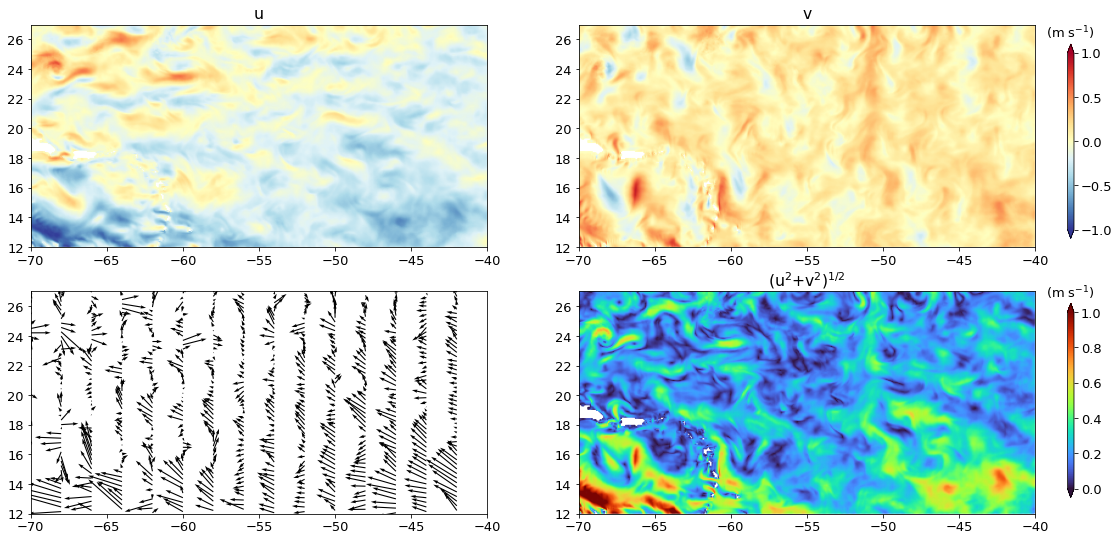

In [44]:
### plot u, v
unit = '(m s$^{-1}$)'
varlim = [-1,1]
nskip = 100
###
nrow = 2
ncol = 2
plt.clf()
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_size_inches(18,9)
### u
plt.subplot(nrow,ncol,1)
uplot = u_velocity[0,0,:,:].flatten()
print(uplot[ixy].shape, Longitude180.flatten()[ixy].shape)
sc = plt.scatter(Longitude180.flatten()[ixy],Latitude.flatten()[ixy],s=1,c=uplot[ixy],cmap='RdYlBu_r',vmin=varlim[0],vmax=varlim[1])
plt.title('u')
### v
plt.subplot(nrow,ncol,2)
vplot = v_velocity[0,0,:,:].flatten()
sc = plt.scatter(Longitude180.flatten()[ixy],Latitude.flatten()[ixy],s=1,c=vplot[ixy],cmap='RdYlBu_r',vmin=varlim[0],vmax=varlim[1])
plt.title('v')
### colorbar - u/v
cbar_ax = fig.add_axes([.925,.55,.005,.3])
axf = plt.colorbar(sc,orientation='vertical',cax=cbar_ax,extend='both')
cbar_ax.set_title(unit,fontsize=13)

### quiver plot
plt.subplot(nrow,ncol,3)
plt.quiver(Longitude180.flatten()[ixy][::nskip], Latitude.flatten()[ixy][::nskip], uplot[ixy][::nskip], vplot[ixy][::nskip], scale=10)
### total velocity
plt.subplot(nrow,ncol,4)
varplot = np.sqrt( np.square(uplot[ixy]) + np.square(vplot[ixy]) )
sc1 = plt.scatter(Longitude180.flatten()[ixy], Latitude.flatten()[ixy],s=1,c=varplot,cmap='turbo',vmin=0,vmax=1)
plt.title('(u$^2$+v$^2$)$^{1/2}$')
### colorbar - total vel
cbar_ax = fig.add_axes([.925,.15,.005,.3])
axf = plt.colorbar(sc1,orientation='vertical',cax=cbar_ax,extend='both')
cbar_ax.set_title(unit,fontsize=13)
###
for i in range(4):
    plt.subplot(nrow,ncol,i+1)
    plt.xlim(lonlim)
    plt.ylim(latlim)
### save figure
plt.savefig('maps_uv_velocity_('+filename+').png',dpi=400,bbox_inches='tight')

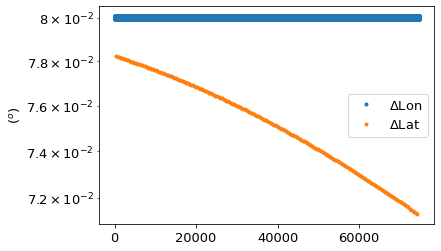

In [53]:
### Grid size of Longitude and Latitude (in degree)
plt.semilogy(np.diff(Longitude180.flatten()[ixy]),'.',label='$\Delta$Lon')
plt.semilogy(np.diff(Latitude.flatten()[ixy]),'.',label='$\Delta$Lat')
plt.ylabel('($^o$)')
plt.legend()